In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import precision_score , confusion_matrix, roc_auc_score 
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

import datetime

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv("./data/assignment_train.csv")
test = pd.read_csv("./data/assignment_test.csv")
train.head(n=2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [3]:
train.shape, test.shape

((50001, 394), (75000, 394))

In [4]:
def count_feature_type(df):
    return df.dtypes.value_counts()

print(count_feature_type(train), '\n' , '='*24)
print(count_feature_type(test))

float64    376
object      14
int64        4
dtype: int64 
float64    376
object      14
int64        4
dtype: int64


In [5]:
def check_missing(df: pd.DataFrame, axis: int=0) -> pd.DataFrame:
    """Провека стобцов данных на пропуски
    Args
    df: data frame.
    axis: int. 0 соответствует колонке и 1 соответствует строке
    
    Returns
    missing_info: data frame.     """

    missing_num = df.isnull().sum(axis).to_frame().rename(columns={0:'missing_num'})
    missing_num['missing_percent'] = df.isnull().mean(axis)*100
    return missing_num.sort_values(by='missing_percent',ascending = False) 

df_missing = check_missing(train, axis=0)
df_missing.head(5)

,missing_num,missing_percent
D7,47645,95.288094
dist2,46646,93.290134
D13,46323,92.644147
D12,45904,91.806164
D14,45673,91.344173


In [6]:
df_missing.loc[df_missing['missing_percent'] > 75].count()

missing_num        59
missing_percent    59
dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

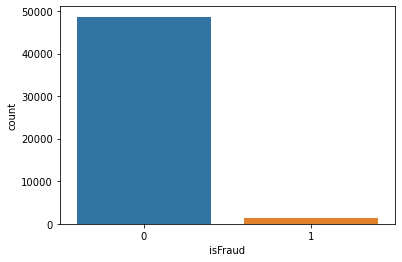

In [7]:
sns.countplot(train['isFraud'])

In [8]:
train[train['isFraud'] == 1].count()[0]

1357

In [9]:
def get_day_hour (df: pd.DataFrame):
    """Добавление столбцов день и час
    Args
    df: data frame.
    
    Returns
    df: data frame.     """
    
    df['date'] = df['TransactionDT'].apply(lambda x: (datetime.timedelta(seconds = x).days))
    df['hours'] = df['TransactionDT'].apply(lambda x: (x % (datetime.timedelta(seconds = x).days * 3600*24))  // 3600)
    return df

train = get_day_hour (train)
test = get_day_hour (test)

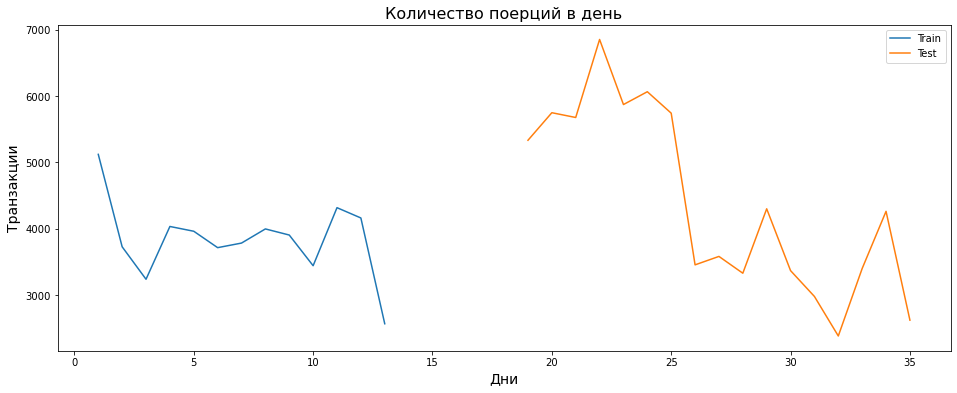

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
train['date'].value_counts().sort_index().plot(ax=axes).set_xlabel('Дни', fontsize=14);
test['date'].value_counts().sort_index().plot(ax=axes).set_ylabel('Транзакции', fontsize=14);
axes.set_title('Количество поерций в день', fontsize=16);
axes.legend(['Train', 'Test']);

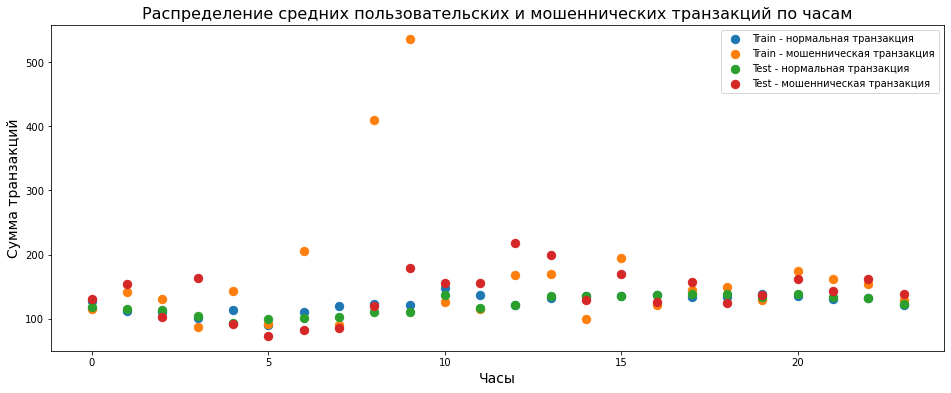

In [11]:
ig, axes = plt.subplots(1, 1, figsize=(16, 6))
plt.scatter( train['hours'].unique(), train.loc[train['isFraud'] == 0].groupby('hours')['TransactionAmt'].mean(),  s=70)
plt.scatter( train['hours'].unique(), train.loc[train['isFraud'] == 1].groupby('hours')['TransactionAmt'].mean(),  s=70)
plt.scatter( test['hours'].unique(), test.loc[test['isFraud'] == 0].groupby('hours')['TransactionAmt'].mean(),  s=70)
plt.scatter( test['hours'].unique(), test.loc[test['isFraud'] == 1].groupby('hours')['TransactionAmt'].mean(),  s=70)
plt.ylabel("Сумма транзакций", size=14)
plt.xlabel('Часы', size=14)
axes.set_title('Распределение средних пользовательских и мошеннических транзакций по часам', fontsize=16);
axes.legend(['Train - нормальная транзакция', 'Train - мошенническая транзакция',\
             'Test - нормальная транзакция', 'Test - мошенническая транзакция']);

Жадность правит балом особенно на трейне

Text(0, 0.5, 'Density')

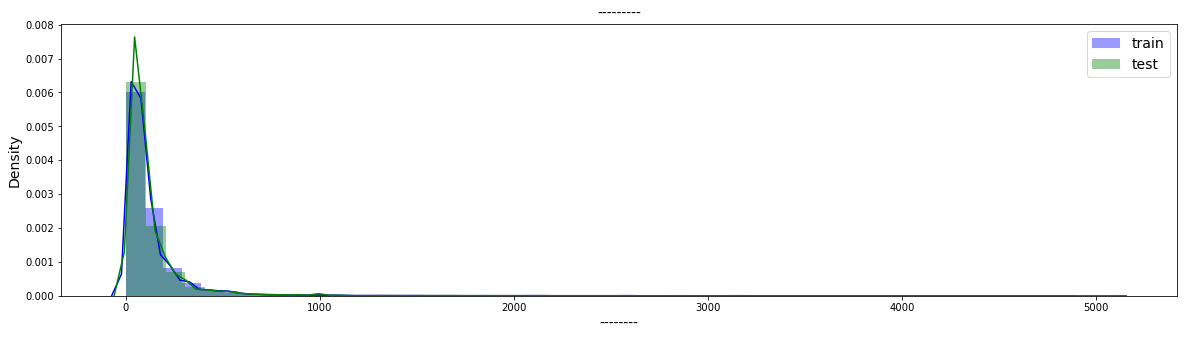

In [12]:
plt.figure(figsize=(20,5))
sns.distplot(train['TransactionAmt'], color="Blue", label="train")
sns.distplot(test['TransactionAmt'], color="Green", label="test")

plt.xlabel("--------", size=14)
plt.title("---------", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

Задание 1: сделать Hold-Out валидацию с разбиением, размер которого будет адеквтаным, по вашему мнению; разбиение проводить по id-транзакции (TransactionID), обучать модель градиетного бустинга любой реализации с подбором числа деревьев по early_stopping критерию до достижения сходимости. Оценить качество модели на тестовой выборке, оценить расхождение по сравнению с качеством на обучающей выборке и тестовой выборке.

In [13]:
for f in train.columns:
    if  train[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train[f].values) + list(test[f].values))
        train[f] = lbl.transform(list(train[f].values))
        test[f] = lbl.transform(list(test[f].values))  
train = train.reset_index()
test = test.reset_index()

In [14]:

x_train, x_test = train_test_split(
    train.drop(["TransactionID", "isFraud"], axis=1), train_size=0.75, shuffle=True, random_state=42,
)
y_train, y_test = train_test_split(
    train["isFraud"], train_size=0.75, shuffle=True, random_state=42,
)   



model = xgb.XGBClassifier( 
        missing=np.NaN,
        n_estimators=1000,
        max_depth=12, 
        learning_rate=0.02,
        subsample=0.8,
        colsample_bytree=0.4, 
        eval_metric='auc',
        tree_method='hist'
    )

In [15]:
cv = cross_val_score(
    estimator=model,
    X=train.drop(["TransactionID", "isFraud"], axis=1),
    y=train["isFraud"],
    scoring= "roc_auc",
    cv=5
)
print(cv)
print(f"CV-results: {round(np.mean(cv), 4)} +/- {round(np.std(cv), 3)}")

[0.8944582  0.91302186 0.91609898 0.88232427 0.90319446]
CV-results: 0.9018 +/- 0.012


In [16]:
model.fit(x_train, y_train)
pred = model.predict_proba(x_test)
pred = 1*(pred[:, 1]>0.5)

In [17]:
print(confusion_matrix(y_test, pred))
print(f'ROC-AUC: {roc_auc_score(y_test, pred)}') 

[[12148     7]
 [  190   156]]
ROC-AUC: 0.7251455786647898


In [18]:
pred_test = model.predict_proba(test.drop(["TransactionID", "isFraud"], axis=1))
pred_test = 1*(pred_test[:, 1]>0.5)
print(confusion_matrix( test["isFraud"], pred_test))
print(f'ROC-AUC: {roc_auc_score(test["isFraud"], pred_test)}') 

[[72990    62]
 [ 1472   476]]
ROC-AUC: 0.6217522361219782
